# Introduction To Machine Learning
# CSL 2010
# Project

# Mobile price prediction and explainability

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



**1.  Data Familiarization**




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cell_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cellphone.csv')

In [ ]:
cell_data.head(10)

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
5,947,2137,12,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
6,774,1238,13,134.1,4.0,233,2,1.20,8.0,1.000,2.00,0.0,1560,11.7
7,947,2137,13,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
8,99,1315,14,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
9,1103,2580,15,145.0,5.1,432,4,2.50,16.0,2.000,16.00,2.0,2800,8.1


In [ ]:
print(f'Shape of dataframe: {cell_data.shape}')

Shape of dataframe: (161, 14)


In [ ]:
cell_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [ ]:
cell_data.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000




**2.  Data Preprocessing**




Check for missing values

In [ ]:
missing_values = cell_data.isnull().sum()
print("Missing Values:")
print(f"no of missing values in data are {missing_values}")

print("-------------------------------------------------------")

print(f"Tota no of missing values are {missing_values.sum()}")

Missing Values:
no of missing values in data are Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64
-------------------------------------------------------
Tota no of missing values are 0


Check for duplicate rows

In [ ]:
duplicates = cell_data.duplicated().sum()
print("Duplicate Rows:", duplicates)

Duplicate Rows: 0





**3.   Exploratory Data Analysis (EDA)**  



Distribution of numerical features

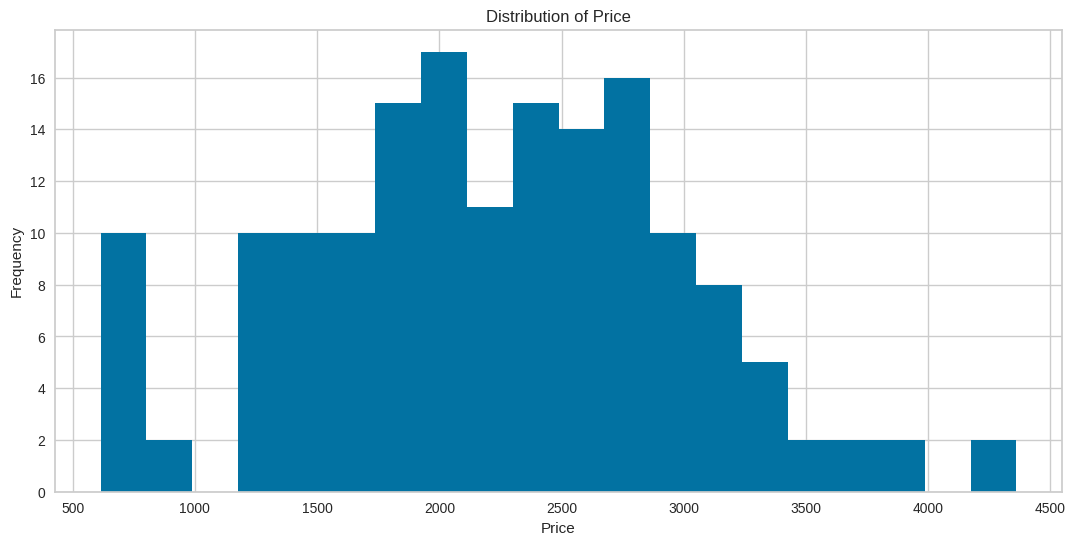

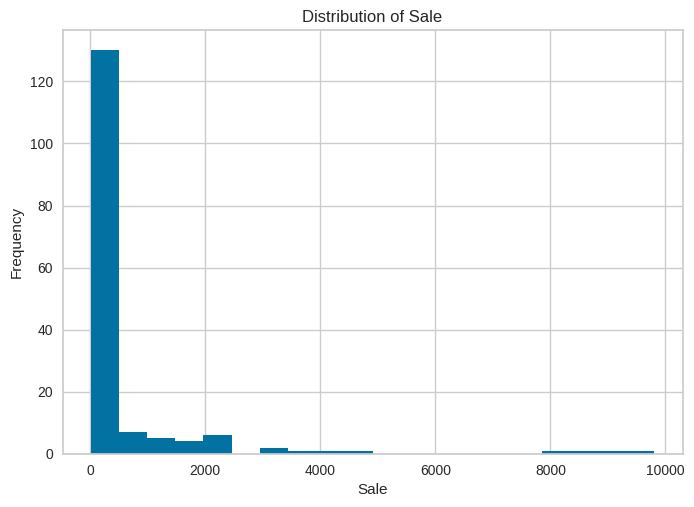

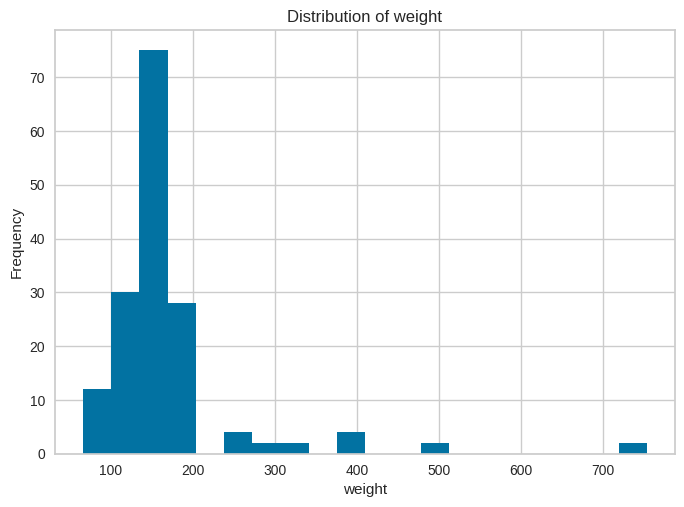

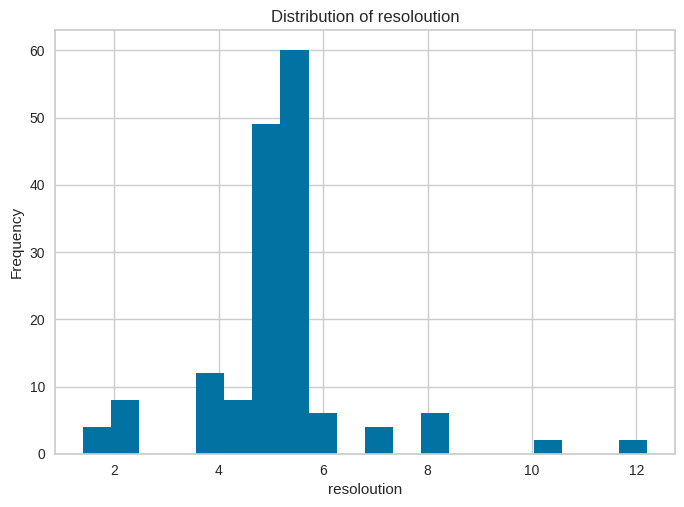

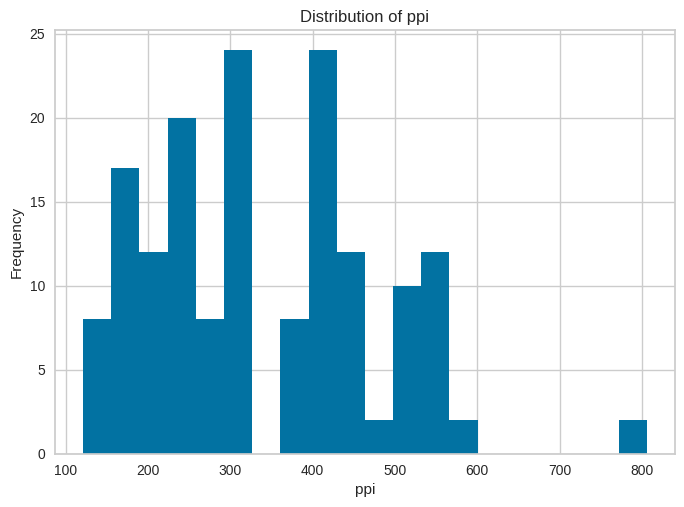

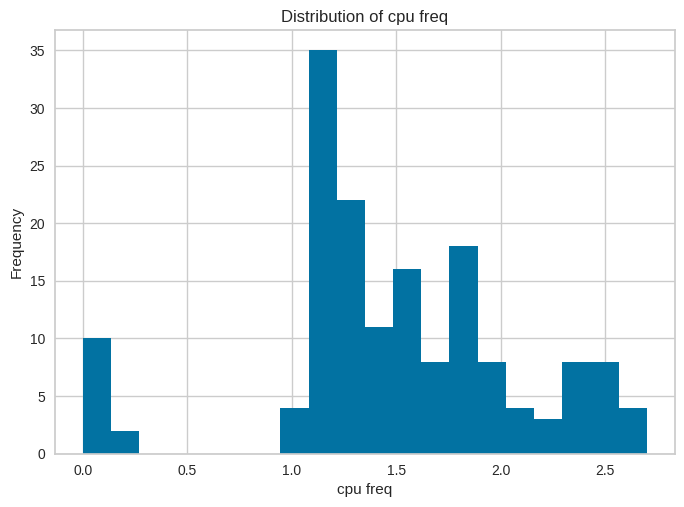

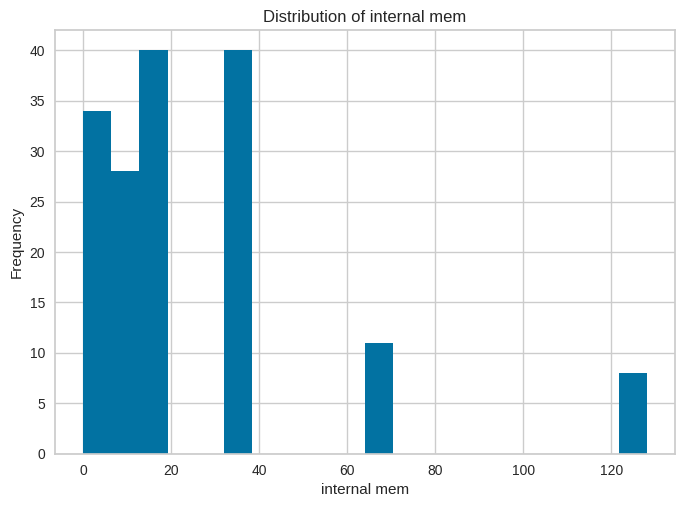

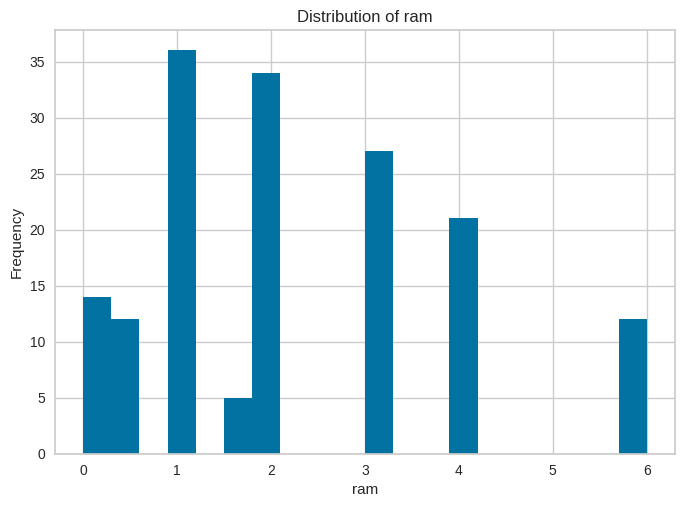

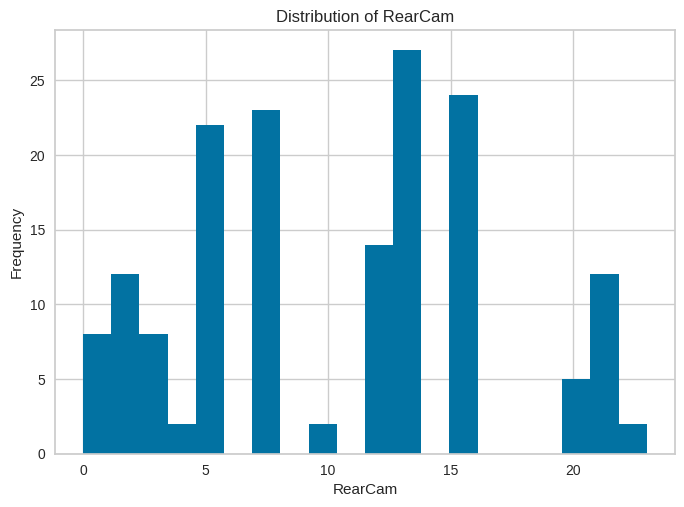

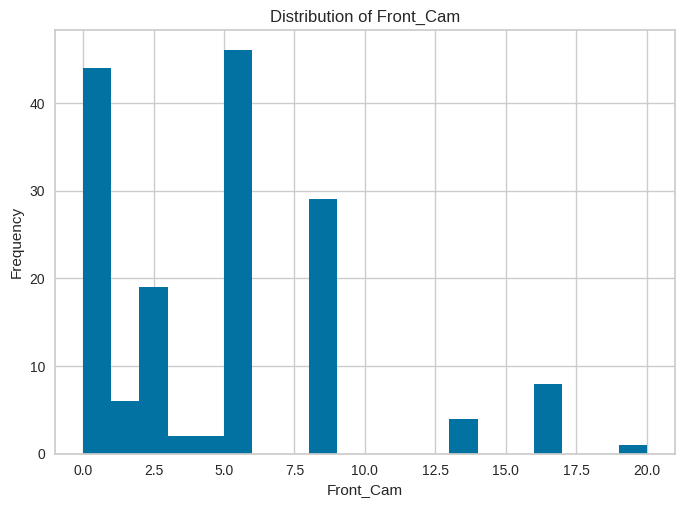

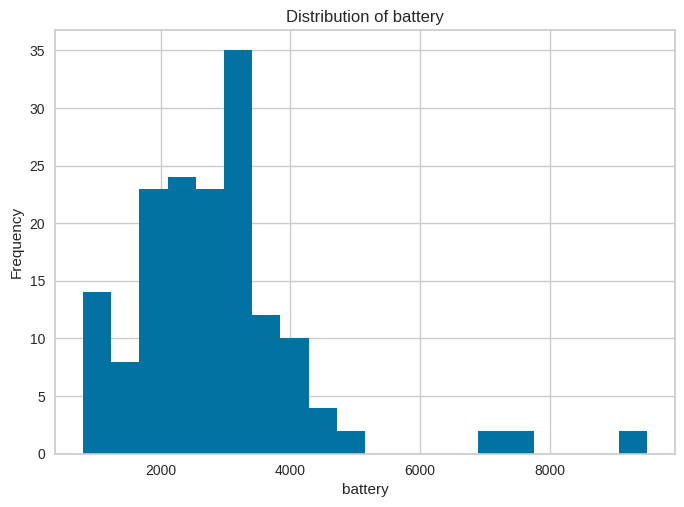

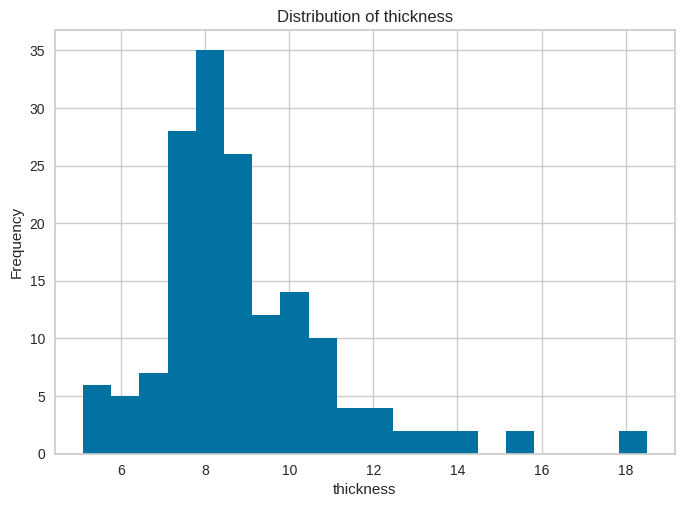

In [ ]:
plt.figure(figsize=(13, 6))
numerical_cols = ['Price', 'Sale', 'weight', 'resoloution', 'ppi', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness']
for col in numerical_cols:
    plt.hist(cell_data[col], bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

**Correlation Matrix**

In [ ]:
corr = cell_data.corr()
np.fill_diagonal(corr.values, 1)
corr

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
Product_id,1.000000,0.165136,0.218548,0.035869,-0.017817,0.207271,-0.008634,0.092428,0.261186,0.236194,0.172812,0.071020,0.031745,0.039807
Price,0.165136,1.000000,0.273263,0.144555,0.404010,0.817614,0.686811,0.727383,0.776738,0.896915,0.739538,0.675286,0.559946,-0.716773
Sale,0.218548,0.273263,1.000000,0.016114,0.017154,0.235896,0.069517,0.099133,0.489308,0.373127,0.292164,0.437233,0.120338,-0.047991
weight,0.035869,0.144555,0.016114,1.000000,0.890416,-0.054683,0.216257,0.222730,0.098849,0.149283,-0.029448,-0.005971,0.833783,-0.185262
resoloution,-0.017817,0.404010,0.017154,0.890416,1.000000,0.181292,0.472226,0.505454,0.202660,0.327216,0.249892,0.202720,0.843462,-0.533708
ppi,0.207271,0.817614,0.235896,-0.054683,0.181292,1.000000,0.487990,0.713168,0.618560,0.748724,0.774008,0.491371,0.302517,-0.496791
cpu core,-0.008634,0.686811,0.069517,0.216257,0.472226,0.487990,1.000000,0.491519,0.276251,0.483128,0.611353,0.586698,0.459728,-0.697935
cpu freq,0.092428,0.727383,0.099133,0.222730,0.505454,0.713168,0.491519,1.000000,0.441400,0.633547,0.625104,0.358319,0.473137,-0.614458
internal mem,0.261186,0.776738,0.489308,0.098849,0.202660,0.618560,0.276251,0.441400,1.000000,0.875354,0.451917,0.555733,0.461506,-0.367412
ram,0.236194,0.896915,0.373127,0.149283,0.327216,0.748724,0.483128,0.633547,0.875354,1.000000,0.648073,0.647470,0.541001,-0.521074


*Correlation between variables visualized with sns.heatmap*

<Axes: >

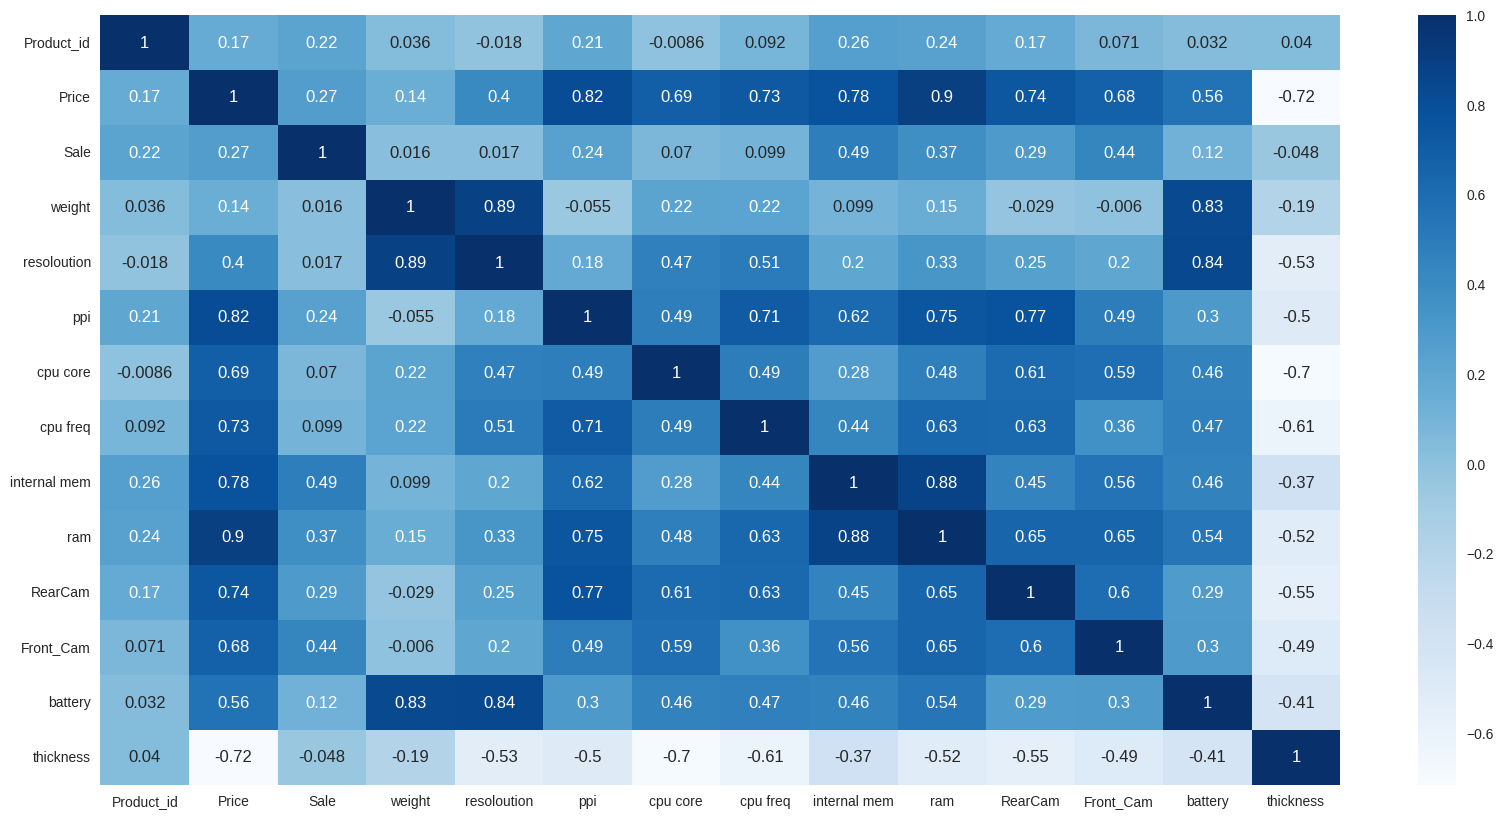

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='Blues')

In [ ]:
corr.unstack().sort_values(kind='quicksort', na_position='first').drop_duplicates(keep='last')

Price        thickness      -0.716773
thickness    cpu core       -0.697935
cpu freq     thickness      -0.614458
RearCam      thickness      -0.550998
thickness    resoloution    -0.533708
                               ...   
resoloution  battery         0.843462
ram          internal mem    0.875354
weight       resoloution     0.890416
ram          Price           0.896915
thickness    thickness       1.000000
Length: 92, dtype: float64

Very high correlation between "Price" and "ram" -- this means that we should use the ram variable in predicting the price range of a mobile phone when doing our Machine Learning prediction

Display highest correlations between price_range and the other features in our dataset

In [ ]:
corr.abs()['Price'].sort_values(ascending=False)

Price           1.000000
ram             0.896915
ppi             0.817614
internal mem    0.776738
RearCam         0.739538
cpu freq        0.727383
thickness       0.716773
cpu core        0.686811
Front_Cam       0.675286
battery         0.559946
resoloution     0.404010
Sale            0.273263
Product_id      0.165136
weight          0.144555
Name: Price, dtype: float64

The highest correlations to our target variable (Price) are:



1.   ram
2.   ppi
3.   internal mem
4.   RearCam



**Key Variables Visualizations**

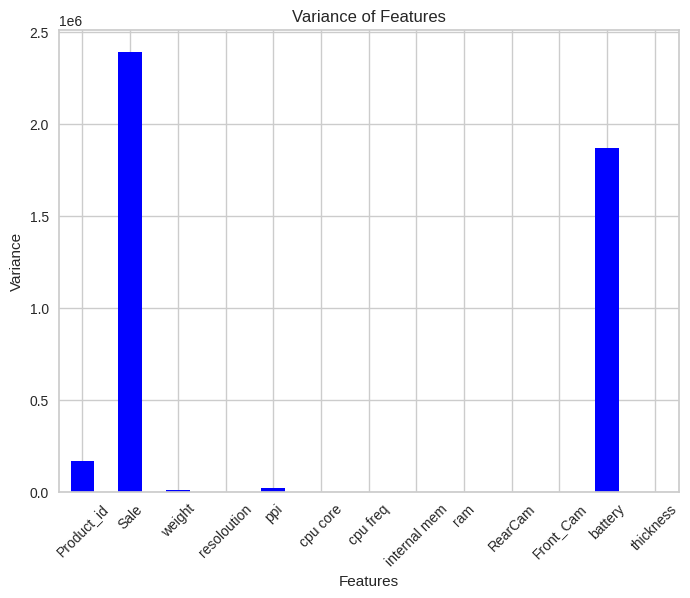

In [ ]:
variance = cell_data.drop('Price', axis = 1).var()

plt.figure(figsize=(8, 6))
variance.plot(kind='bar', color='blue')
plt.title('Variance of Features')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

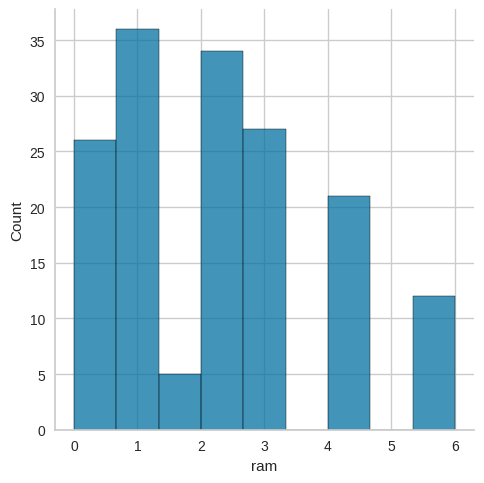

In [ ]:
sns.displot(cell_data, x='ram')

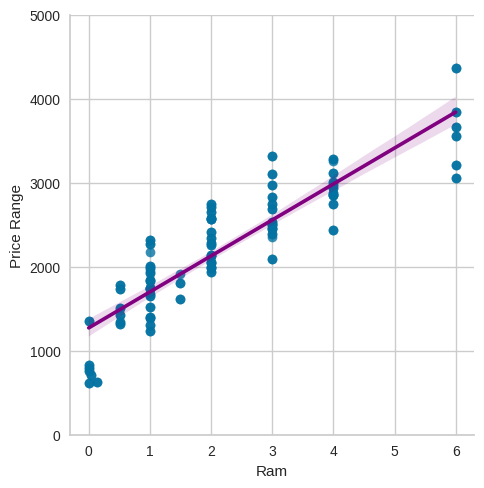

In [ ]:
sns.lmplot(x='ram', y='Price', data=cell_data, line_kws={'color': 'purple'})
plt.yticks([0, 1000, 2000, 3000, 4000, 5000])
plt.xlabel('Ram')
plt.ylabel('Price Range')
plt.show()

The plot aboves shows the high correlation between ram and price range. It shows the general pattern: as ram increases, mobile's price increases

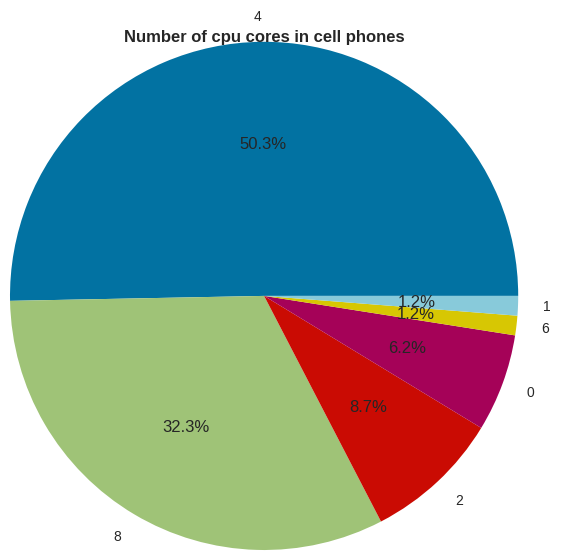

In [ ]:
n_cores = cell_data['cpu core'].value_counts()
plt.title('Number of cpu cores in cell phones\n\n', weight='bold')
n_cores.plot.pie(autopct="%.1f%%", radius=1.5)
plt.show()

Next, we'll use plotly to visualize the 3 most highly correlated variables to price_range

In [ ]:
import plotly.express as px
fig = px.scatter_3d(cell_data.head(1000), x='ram', y='ppi', z='internal mem', color='Price')
fig.show()

Above, we see how ram, ppi , and internal memory all contribute to a mobile phone's price classification

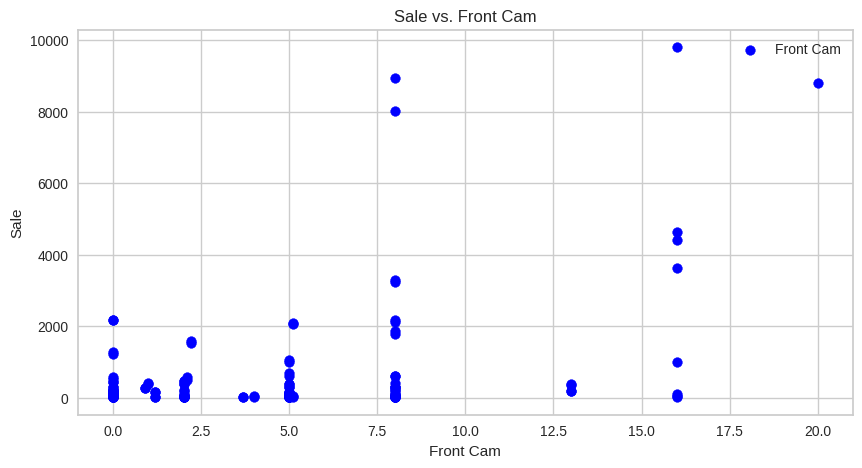

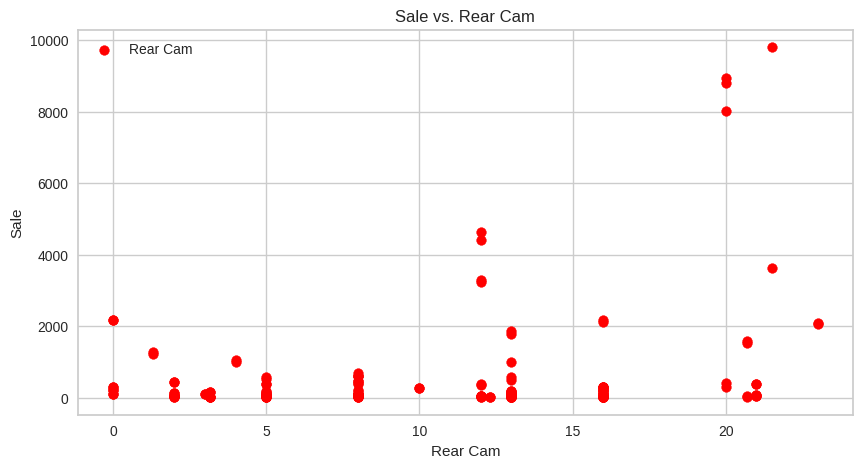

In [ ]:
# scatter plot for Sale vs. Front_Cam
plt.figure(figsize=(10, 5))
plt.scatter(cell_data['Front_Cam'], cell_data['Sale'], color='blue', label='Front Cam')
plt.title('Sale vs. Front Cam')
plt.xlabel('Front Cam')
plt.ylabel('Sale')
plt.legend()
plt.grid(True)
plt.show()

# scatter plot for Sale vs. RearCam
plt.figure(figsize=(10, 5))
plt.scatter(cell_data['RearCam'], cell_data['Sale'], color='red', label='Rear Cam')
plt.title('Sale vs. Rear Cam')
plt.xlabel('Rear Cam')
plt.ylabel('Sale')
plt.legend()
plt.grid(True)
plt.show()

A scatter plot of "Sales" vs. "Front Cam" and "Sales" vs. "Rear Cam" helps in predicting cellphone prices indirectly by providing insights into the preferences and priorities of consumers when purchasing cellphones.

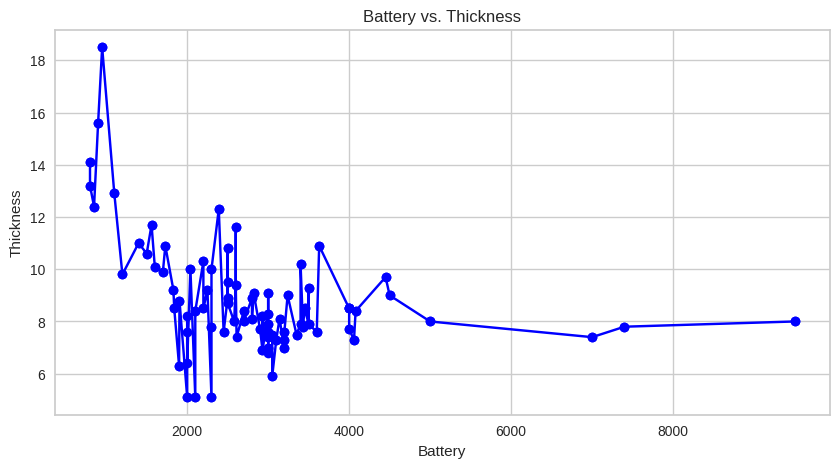

In [ ]:
# Sort the data by "battery" for better visualization
cell_data.sort_values(by='battery', inplace=True)

# Create a line plot for Battery vs. Thickness
plt.figure(figsize=(10, 5))
plt.plot(cell_data['battery'], cell_data['thickness'], color='blue', marker='o', linestyle='-')
plt.title('Battery vs. Thickness')
plt.xlabel('Battery')
plt.ylabel('Thickness')
plt.grid(True)
plt.show()

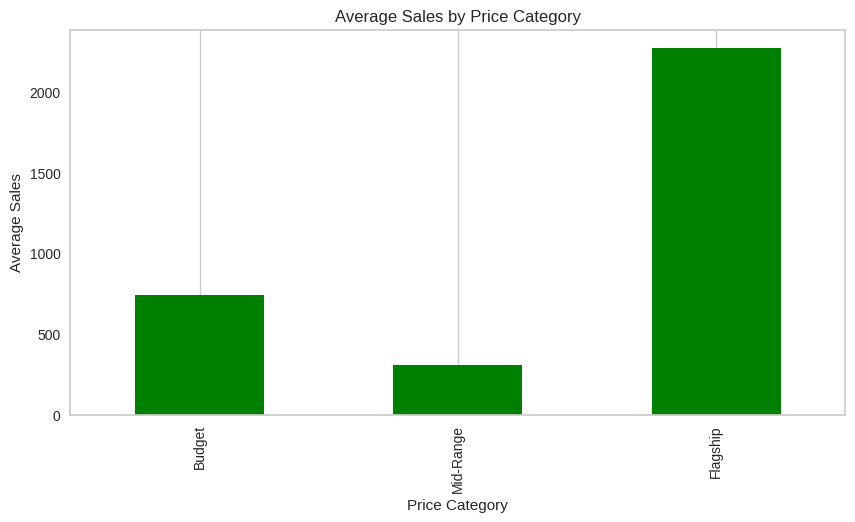

In [ ]:
data = cell_data.copy()
price_ranges = ['Budget', 'Mid-Range', 'Flagship']
data['Price Category'] = pd.cut(data['Price'], bins=[0, 1000, 3000, max(data['Price'])], labels=price_ranges)
avg_sales_by_price = data.groupby('Price Category')['Sale'].mean()
plt.figure(figsize=(10, 5))
avg_sales_by_price.plot(kind='bar', color='green')
plt.title('Average Sales by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Average Sales')
plt.grid(axis='y')
plt.show()

 prices below 1000 are categorized as "Low," prices between 1000 and 3000 are categorized as "Medium," and prices above 3000 are categorized as "High.

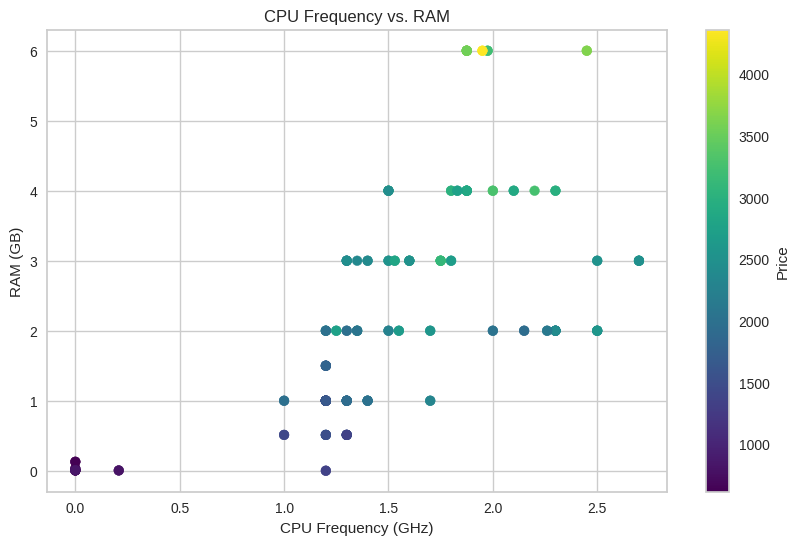

In [ ]:
# Create a scatter plot for CPU Frequency vs. RAM
plt.figure(figsize=(10, 6))
plt.scatter(data['cpu freq'], data['ram'], c=data['Price'], cmap='viridis', marker='o')
plt.title('CPU Frequency vs. RAM')
plt.xlabel('CPU Frequency (GHz)')
plt.ylabel('RAM (GB)')
plt.colorbar(label='Price')
plt.grid(True)
plt.show()

# APPLYING KNN

In [ ]:
X = cell_data.drop(['Price', 'Product_id'], axis=1).values
y = cell_data['Price'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=100)

In [ ]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = KNeighborsClassifier(n_neighbors=5) #Selecting a Random K value
model.fit(X_train_scaled, y_train)
y_pred_knn = model.predict(X_test_scaled)
model_score = model.score(X_test_scaled, y_test)
model_score

0.02040816326530612

In [ ]:
print(f"Accuracy achieved by KNN model {round(model_score*100, 2)} %")

Accuracy achieved by KNN model 2.04 %


In [ ]:
r2_knn = r2_score(y_test, y_pred_knn)
print("KNN Model:")
print(f"R-squared (R2) Score: {r2_knn}")

KNN Model:
R-squared (R2) Score: 0.7529410441329474


Hyperparameter tuning: KNeighborsClassifier

In [ ]:
test_scores = []

neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)

    knn.fit(X_train, y_train)

    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 75.51%


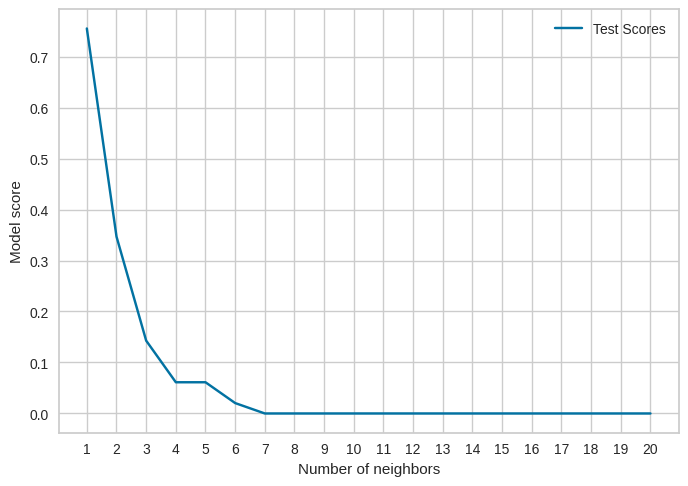

In [ ]:
plt.plot(neighbors, test_scores, label="Test Scores")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'KNN Model Score: {round(knn.score(X_test, y_test) * 100, 2)} %')

KNN Model Score: 75.51 %


In [ ]:
r2_knn = r2_score(y_test, y_pred)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred))
print("KNN Model:")
print(f"R-squared (R2) Score: {r2_knn}")
print(f"RMSE score: {rmse_knn}")

KNN Model:
R-squared (R2) Score: 0.9299528361149615
RMSE score: 212.0606382281122


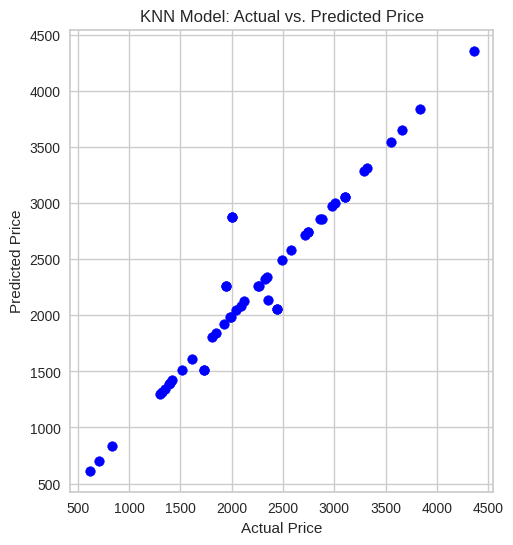

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', marker='o')
plt.title('KNN Model: Actual vs. Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)

# Applying Linear Regression

In [ ]:
# Separate features (X) and target variable (y)
X = cell_data.drop('Price', axis=1)
y = cell_data['Price']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the MinMaxScaler and fit_transform on training set
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test set
X_test_scaled = scaler.transform(X_test)



In [ ]:
# Initialize the linear regression model
l_r = LinearRegression()

# Train the model on the scaled training set
mod1 = l_r.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred_lr_scaled = l_r.predict(X_test_scaled)
# Evaluate the model
r2_lr = r2_score(y_test, y_pred_lr_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr_scaled)
print(f'R-squared: {r2_lr}')
print(f'Mean Squared Error: {mse_lr}')

R-squared: 0.9499369056976361
Mean Squared Error: 24694.81753813955


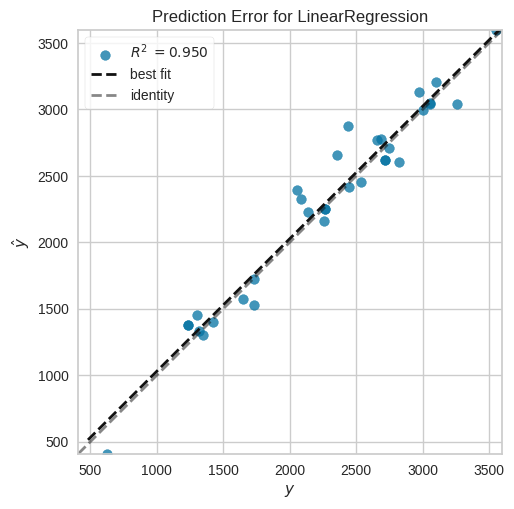

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(mod1)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

# Regression Tree

In [ ]:
# Initialize the decision tree regressor
tree_model = DecisionTreeRegressor(random_state=42)

# Train the decision tree model
mod2 = tree_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test_scaled)

# Evaluate the model
r2_tree = r2_score(y_test, y_pred_tree)
print(f'R-squared: {r2_tree}')
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f'Mean Squared Error: {mse_tree}')

R-squared: 0.8757955392257892
Mean Squared Error: 61266.818181818184


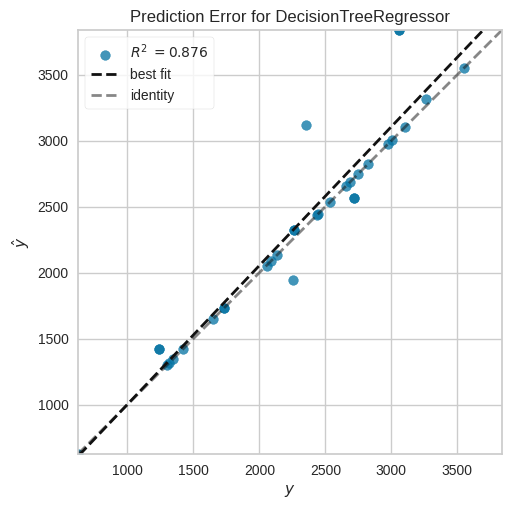

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(mod2)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

# Applying PCA With Linear Regression

In [ ]:
pca = PCA(n_components=5)  # Selecting a random n_component value
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train a linear regression model on the reduced feature set
model = LinearRegression()
mod3 = model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_pca = model.predict(X_test_pca)

# Evaluate the model

r2 = r2_score(y_test, y_pred_pca)
print(f'R-squared: {r2}')
mse = mean_squared_error(y_test, y_pred_pca)
print(f'Mean Squared Error: {mse}')

R-squared: 0.9160982686324638
Mean Squared Error: 41386.533855488684


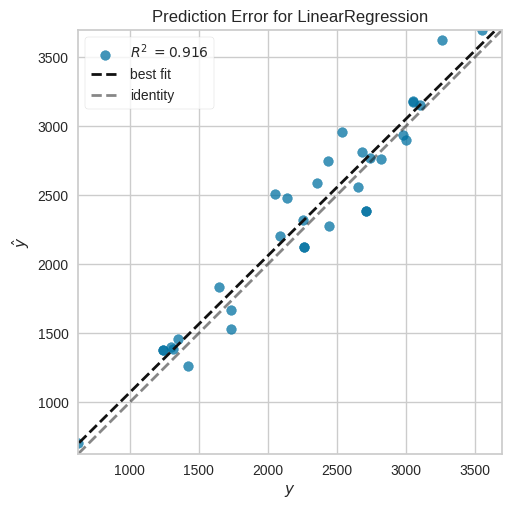

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(mod3)
visualizer.score(X_test_pca, y_test)
visualizer.show()

**Checking for best n_component value using explained variance ratio**

Selected n_components: 8


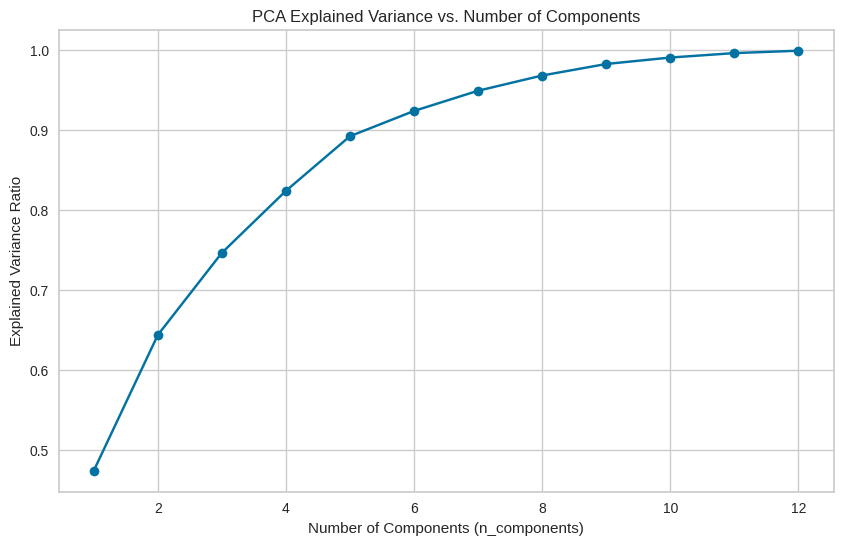

In [ ]:
# Define a list of n_components values to try
n_components_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

explained_variances = []

for n_components in n_components_values:
    pca = PCA(n_components=n_components)
    pca.fit(X_train_scaled)
    explained_variances.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(10, 6))
plt.plot(n_components_values, explained_variances, marker='o', linestyle='-')
plt.xlabel('Number of Components (n_components)')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance vs. Number of Components')
plt.grid(True)


target_variance_ratio = 0.95

# Find the best n_components value that achieves or exceeds the target variance ratio
selected_n_components = None
for n_components, explained_variance in zip(n_components_values, explained_variances):
    if explained_variance >= target_variance_ratio:
        selected_n_components = n_components
        break

if selected_n_components is not None:
    print(f"Selected n_components: {selected_n_components}")
else:
    print("No n_components value achieved the target explained variance ratio.")

plt.show()

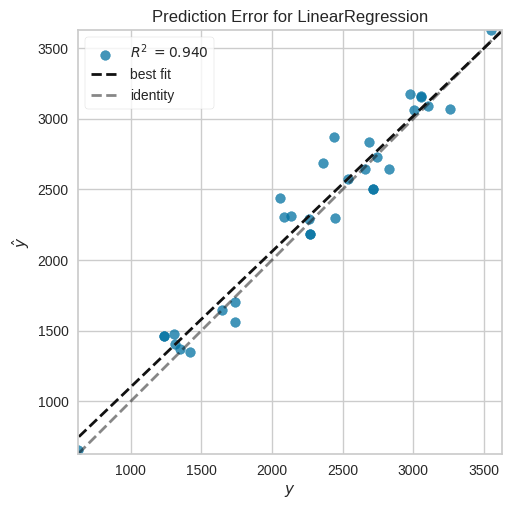

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
pca = PCA(selected_n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

pca_lr = LinearRegression()
mod3 = model.fit(X_train_pca, y_train)


y_pred_pca = model.predict(X_test_pca)

from yellowbrick.regressor import PredictionError

visualizer = PredictionError(mod3)
visualizer.score(X_test_pca, y_test)
visualizer.show()

In [ ]:
# Evaluate the model

r2_pca = r2_score(y_test, y_pred_pca)

print(f'R-squared: {r2_pca}')
mse_pca = mean_squared_error(y_test, y_pred_pca)
print(f'Mean Squared Error: {mse}')

R-squared: 0.9395626440494069
Mean Squared Error: 41386.533855488684


# Applying Neural Network

In [ ]:
# Extract the target variable 'Price'
target_column = 'Price'
y = cell_data[target_column]

# Extract features and drop unnecessary columns
X = cell_data.drop([target_column, 'Product_id'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Epoch 1/100
4/4 [==============================] - 1s 50ms/step - loss: 5461238.5000 - val_loss: 5628674.0000
Epoch 2/100
4/4 [==============================] - 0s 17ms/step - loss: 5459435.0000 - val_loss: 5627057.5000
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 5457688.0000 - val_loss: 5625381.0000
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 5455934.0000 - val_loss: 5623567.0000
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 5454080.0000 - val_loss: 5621544.5000
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 5451956.0000 - val_loss: 5619235.0000
Epoch 7/100
4/4 [==============================] - 0s 14ms/step - loss: 5449585.5000 - val_loss: 5616586.5000
Epoch 8/100
4/4 [==============================] - 0s 11ms/step - loss: 5446700.0000 - val_loss: 5613571.5000
Epoch 9/100
4/4 [==============================] - 0s 12ms/step - loss: 5443609.0000 - val_loss: 5609987.0000
Epoch 10/1

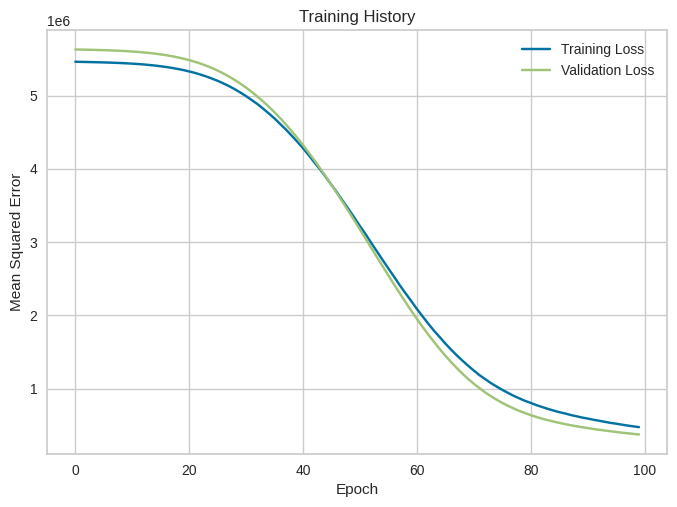

In [ ]:
# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training History')
plt.legend()
plt.show()

Scaling The Target variables to improve model performance

In [ ]:
from tensorflow.keras.optimizers import Adam
# Normalize the target variable
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1, 1))
y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1, 1))

# Build the neural network model
model_nn = Sequential()
model_nn.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model with a lower learning rate
model_nn.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# Train the model
history = model_nn.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test_scaled), verbose=1)

# Invert scaling for predictions
y_pred_scaled = model_nn.predict(X_test_scaled)
y_pred_nn = scaler_y.inverse_transform(y_pred_scaled)

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f'Mean Squared Error: {mse_nn}')
print(f'R-squared: {r2_nn}')




Epoch 1/100
4/4 [==============================] - 1s 48ms/step - loss: 1.4168 - val_loss: 1.0612
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 1.3135 - val_loss: 0.9826
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 1.2207 - val_loss: 0.9082
Epoch 4/100
4/4 [==============================] - 0s 18ms/step - loss: 1.1374 - val_loss: 0.8363
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 1.0496 - val_loss: 0.7691
Epoch 6/100
4/4 [==============================] - 0s 17ms/step - loss: 0.9753 - val_loss: 0.7050
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 0.8945 - val_loss: 0.6451
Epoch 8/100
4/4 [==============================] - 0s 19ms/step - loss: 0.8279 - val_loss: 0.5875
Epoch 9/100
4/4 [==============================] - 0s 16ms/step - loss: 0.7671 - val_loss: 0.5327
Epoch 10/100
4/4 [==============================] - 0s 12ms/step - loss: 0.6948 - val_loss: 0.4837
Epoch 11/100
4/4 [=

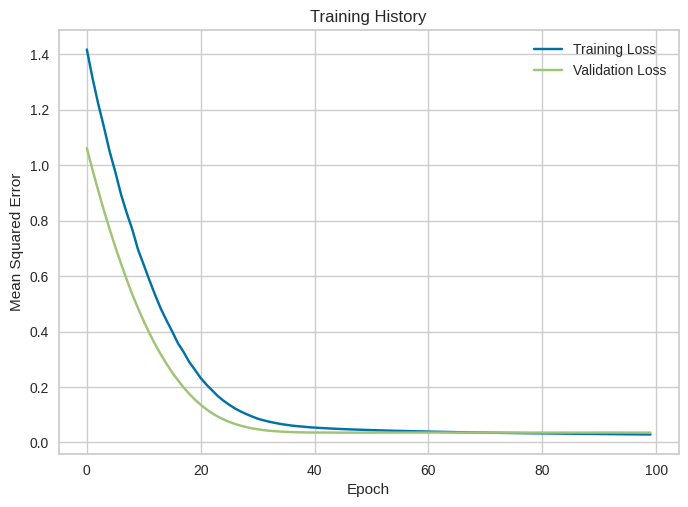

In [ ]:
# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training History')
plt.legend()
plt.show()

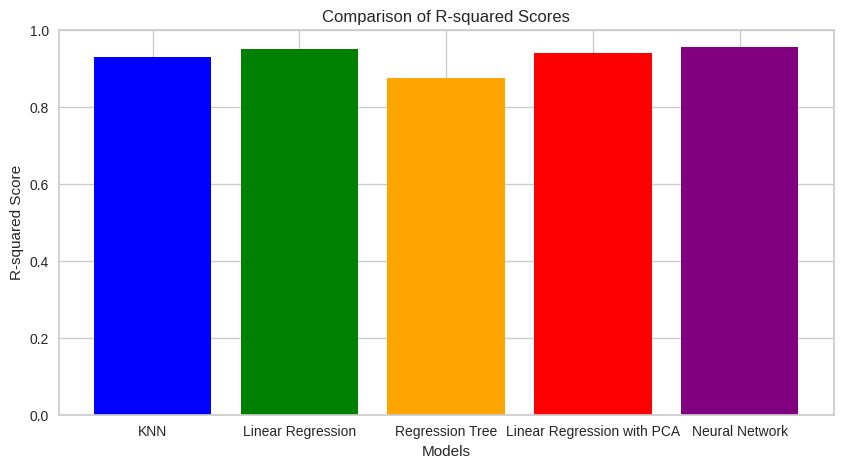

In [ ]:
# Evaluate and compare R-squared scores
plt.figure(figsize=(10, 5))
model_names = ['KNN', 'Linear Regression', 'Regression Tree', 'Linear Regression with PCA', 'Neural Network']
r2_scores = [r2_knn, r2_lr, r2_tree, r2_pca, r2_nn]
model_list = [knn, l_r, tree_model, pca_lr, model_nn]
# Create a bar graph
plt.bar(model_names, r2_scores, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Scores')
plt.ylim(0, 1)  # Set the y-axis range if needed
plt.show()



In [ ]:
max_idx = r2_scores.index((max(r2_scores)))

In [ ]:
print(f"Highest R2 Score Among all models is of {model_names[max_idx]}: {round(max(r2_scores),4)}")

Highest R2 Score Among all models is of Neural Network: 0.9561


In [ ]:
pred_model = model_list[max_idx]

Hence we can say that neural network is the best model to do the predictions for this task

Making Prediction with model having highest r2 score i.e. Neural Network by feeding custom values

In [ ]:
custom_input = np.array([[10,	135,	5.2,	424,	8,	1.35,	16,	3,	13,	8,	2610,	7.4]])   # Custom input values
custom_input_scaled = scaler.transform(custom_input)
custom_output_scaled = pred_model.predict(custom_input_scaled) # Make predictions
custom_output = scaler_y.inverse_transform(custom_output_scaled) # Invert scaling to get the final predicted price
print(f'Predicted Price: {custom_output[0][0]}')

1/1 [==============================] - 0s 20ms/step
Predicted Price: 2668.01318359375


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



# Applying Our Model To Self made Custom dataset

We've created a custom dataset with 14 features and 59 rows to test our model's performance and predictability

In [ ]:
custom_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cellphone_custome.csv")

In [ ]:
custom_data.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,289,2438,16,162.0,5.3,277,8,1.5,32,4.0,13.0,8.0,4000,7.7
1,605,2006,16,161.0,5.5,200,8,1.4,4,1.0,5.0,0.0,2500,8.9
2,622,2174,16,140.0,5.0,294,4,1.3,16,1.0,13.0,5.0,2000,8.2
3,1058,2744,16,174.0,5.6,524,4,2.7,32,3.0,16.0,3.7,3000,8.3
4,1103,2580,16,145.0,5.1,432,4,2.5,16,2.0,16.0,2.0,2800,8.1


In [ ]:
custom_data.shape

(59, 14)

In [ ]:
Price_val = custom_data['Price'].values

In [ ]:
X = custom_data.drop(['Product_id', 'Price'], axis = 1)

In [ ]:
predicted_prices = []
for i in range(59):
  custom_input = X.values[i].reshape(1, -1)   # Custom input values
  custom_input_scaled = scaler.transform(custom_input)
  custom_output_scaled = pred_model.predict(custom_input_scaled) # Make predictions
  custom_output = scaler_y.inverse_transform(custom_output_scaled) # Invert scaling to get the final predicted price
  predicted_prices.append(custom_output[0][0])
  print(f'Predicted Price: {custom_output[0][0]}')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



1/1 [==============================] - 0s 23ms/step
Predicted Price: 2781.49951171875
1/1 [==============================] - 0s 19ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



Predicted Price: 1922.4921875
1/1 [==============================] - 0s 22ms/step
Predicted Price: 1942.947509765625
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



Predicted Price: 2688.40625
1/1 [==============================] - 0s 23ms/step
Predicted Price: 2440.231201171875
1/1 [==============================] - 0s 22ms/step
Predicted Price: 1697.0350341796875


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



1/1 [==============================] - 0s 22ms/step
Predicted Price: 2089.4580078125
1/1 [==============================] - 0s 25ms/step
Predicted Price: 2842.56689453125
1/1 [==============================] - 0s 25ms/step
Predicted Price: 1697.0789794921875


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



1/1 [==============================] - 0s 25ms/step
Predicted Price: 1432.847412109375
1/1 [==============================] - 0s 20ms/step
Predicted Price: 2781.35498046875
1/1 [==============================] - 0s 23ms/step
Predicted Price: 2544.49853515625


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



1/1 [==============================] - 0s 22ms/step
Predicted Price: 3023.90576171875
1/1 [==============================] - 0s 29ms/step
Predicted Price: 2688.316650390625
1/1 [==============================] - 0s 22ms/step
Predicted Price: 2080.771728515625


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



1/1 [==============================] - 0s 26ms/step
Predicted Price: 1672.799560546875
1/1 [==============================] - 0s 22ms/step
Predicted Price: 1922.5693359375
1/1 [==============================] - 0s 21ms/step
Predicted Price: 2842.513671875
1/1 [==============================] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



1/1 [==============================] - 0s 25ms/step
Predicted Price: 1672.8203125
1/1 [==============================] - 0s 23ms/step
Predicted Price: 1994.26611328125
1/1 [==============================] - 0s 30ms/step
Predicted Price: 2089.801513671875


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



1/1 [==============================] - 0s 24ms/step
Predicted Price: 3023.92724609375
1/1 [==============================] - 0s 20ms/step
Predicted Price: 2930.126220703125
1/1 [==============================] - 0s 22ms/step
Predicted Price: 2807.919921875
1/1 [==============================] - 0s 26ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



Predicted Price: 2668.01318359375
1/1 [==============================] - 0s 28ms/step
Predicted Price: 1558.043701171875
1/1 [==============================] - 0s 25ms/step
Predicted Price: 2020.615966796875


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



1/1 [==============================] - 0s 34ms/step
Predicted Price: 1418.345947265625
1/1 [==============================] - 0s 20ms/step
Predicted Price: 1558.082763671875
1/1 [==============================] - 0s 21ms/step
Predicted Price: 2263.646728515625


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



1/1 [==============================] - 0s 25ms/step
Predicted Price: 1432.7264404296875
1/1 [==============================] - 0s 23ms/step
Predicted Price: 2263.682861328125
1/1 [==============================] - 0s 44ms/step
Predicted Price: 1418.398681640625


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



1/1 [==============================] - 0s 31ms/step
Predicted Price: 2440.27880859375
1/1 [==============================] - 0s 32ms/step
Predicted Price: 2781.49951171875
1/1 [==============================] - 0s 33ms/step
Predicted Price: 1922.4921875


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



1/1 [==============================] - 0s 27ms/step
Predicted Price: 1942.947509765625
1/1 [==============================] - 0s 28ms/step
Predicted Price: 2688.40625


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



1/1 [==============================] - 0s 46ms/step
Predicted Price: 2440.231201171875
1/1 [==============================] - 0s 32ms/step
Predicted Price: 1697.0350341796875
1/1 [==============================] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



1/1 [==============================] - 0s 39ms/step
Predicted Price: 2089.4580078125
1/1 [==============================] - 0s 36ms/step
Predicted Price: 2842.56689453125
1/1 [==============================] - 0s 30ms/step
Predicted Price: 1697.0789794921875


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



1/1 [==============================] - 0s 30ms/step
Predicted Price: 1432.847412109375
1/1 [==============================] - 0s 32ms/step
Predicted Price: 2781.35498046875
1/1 [==============================] - 0s 33ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



Predicted Price: 2544.49853515625
1/1 [==============================] - 0s 30ms/step
Predicted Price: 3023.90576171875
1/1 [==============================] - 0s 28ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



Predicted Price: 2688.316650390625
1/1 [==============================] - 0s 41ms/step
Predicted Price: 2080.771728515625


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



1/1 [==============================] - 0s 42ms/step
Predicted Price: 1672.799560546875
1/1 [==============================] - 0s 31ms/step
Predicted Price: 1922.5693359375
1/1 [==============================] - 0s 36ms/step
Predicted Price: 2842.513671875


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



1/1 [==============================] - 0s 33ms/step
Predicted Price: 1672.8203125
1/1 [==============================] - 0s 40ms/step
Predicted Price: 1994.26611328125
1/1 [==============================] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



1/1 [==============================] - 0s 38ms/step
Predicted Price: 2089.801513671875
1/1 [==============================] - 0s 28ms/step
Predicted Price: 3023.92724609375
1/1 [==============================] - 0s 38ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



Predicted Price: 2930.126220703125
1/1 [==============================] - 0s 40ms/step
Predicted Price: 2807.919921875


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



1/1 [==============================] - 0s 58ms/step
Predicted Price: 1333.853759765625


In [ ]:
# Evaluate the model
mse = mean_squared_error(Price_val, predicted_prices)
r2 = r2_score(Price_val, predicted_prices)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 33466.33186439059
R-squared: 0.8977696127748862


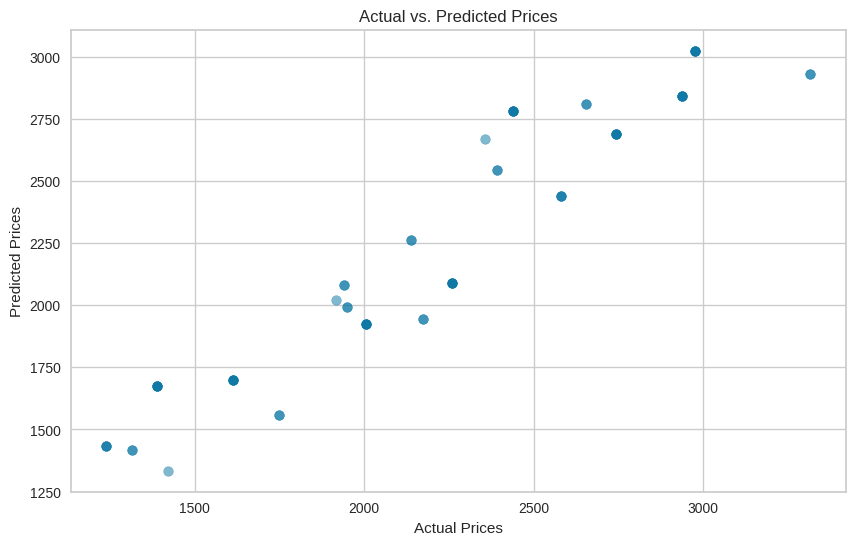

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(Price_val, predicted_prices, alpha=0.5)
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

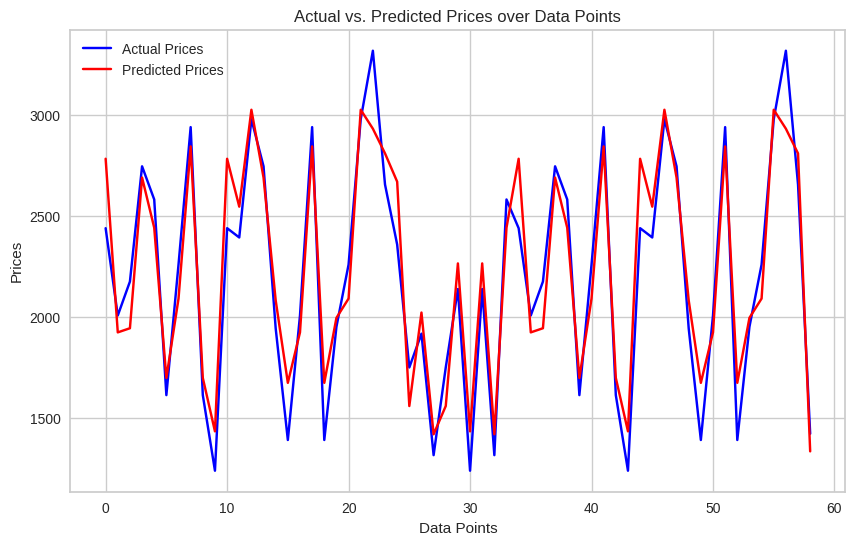

In [ ]:
# Plotting the accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(Price_val, label='Actual Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', color='red')
plt.title('Actual vs. Predicted Prices over Data Points')
plt.xlabel('Data Points')
plt.ylabel('Prices')
plt.legend()
plt.show()

Model's Accuracy

In [ ]:
threshold = 15
percentage_diff = np.abs((Price_val - predicted_prices) / Price_val) * 100
correct_predictions = np.sum(percentage_diff <= threshold)
accuracy = correct_predictions / len(Price_val) * 100
print(f'Accuracy On Custom Dataset: {accuracy:.2f}%')


Accuracy On Custom Dataset: 88.14%


# **END OF ASSIGNMENT**